# **"Pima Indians Diabetes Database"** (Диабетті болжау) деректер жинағы

# Үй жұмысы: Медициналық диагноз қою (Binary Classification)
## Тақырыбы: Диабетті болжау (Diabetes Prediction)

**Мақсаты:**
Бұл жұмыста сіз дайын, тазаланған сандық деректер жинағын қолдана отырып, нейрондық желі құруды үйренесіз. Мақсат – пациенттің медициналық көрсеткіштеріне қарап, оның диабетпен ауыру ықтималдығын болжау.

**Қысқаша теория:**
Біз қарапайым `Feed Forward Neural Network` (Алға таралу желісін) қолданамыз.
Деректер жинағы толығымен сандық болғандықтан, күрделі өңдеу жұмыстары (мәтінді санға айналдыру) қажет емес.

Желі құрылымы:
1.  **Input Layer:** 8 кіріс параметрі (Глюкоза, Қан қысымы, Инсулин және т.б.).
2.  **Hidden Layers:** Ақпаратты өңдеуші қабаттар (`ReLU` активациясымен).
3.  **Output Layer:** 1 нейрон (0 = Диабет жоқ, 1 = Диабет бар), `Sigmoid` активациясымен.

**Тапсырма:**
Төменде `# TODO` деп көрсетілген жерлерді кодпен толықтырыңыз.


In [1]:
# Қажетті кітапханаларды импорттау
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# TensorFlow нұсқасын тексеру
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0



### 1. Деректер жинағын жүктеу

Біз "Pima Indians Diabetes" датасетін тікелей GitHub-тан жүктейміз. Бұл нақты медициналық деректер.


In [2]:
# Деректерді тікелей сілтемеден оқу
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
df = pd.read_csv(url)

# Деректердің алғашқы 5 жолын көрсету
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



### 2. Деректерді шолу

Деректердің типтерін тексеріңіз. Барлығы сандық форматта болғандықтан, `Encoding` (мәтінді кодтау) қажет емес.


In [4]:
# TODO: Деректер жинағының ақпаратын (info) шығарыңыз
# Барлық бағаналар "int" немесе "float" екеніне көз жеткізіңіз
# Сіздің кодыңыз төменде:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



### 3. X және y айнымалыларына бөлу

* **X (Features):** Диагнозға әсер ететін факторлар (алғашқы 8 бағана).
* **y (Target):** `Outcome` бағанасы (1 - ауру бар, 0 - ауру жоқ).


In [5]:
# X және y бөлу
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Жаттығу және тест жиындарына бөлу (Test size = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (614, 8)
Test shape: (154, 8)



### 4. Деректерді масштабтау (Normalization)

Деректер таза болса да (мәтінсіз), олардың өлшем бірліктері әртүрлі (мысалы, Инсулин жүздеген бірлік, ал Жасы ондаған бірлік).
Нейрондық желі дұрыс жұмыс істеуі үшін оларды `StandardScaler` арқылы бір диапазонға келтіру керек.



In [6]:
# Деректерді стандарттау
scaler = StandardScaler()

# X_train деректеріне бейімдеу және түрлендіру
X_train = scaler.fit_transform(X_train)

# X_test деректерін тек түрлендіру (model data leakage болмауы үшін)
X_test = scaler.transform(X_test)


### 5. Нейрондық желі архитекурасы

`Keras` көмегімен модель құрыңыз.
Ұсынылатын құрылым:
* **Input:** 8 нейрон (кіріс деректер санына сәйкес).
* **Hidden 1:** 12 нейрон, `relu` активациясы.
* **Hidden 2:** 8 нейрон, `relu` активациясы.
* **Output:** 1 нейрон, `sigmoid` активациясы.



In [7]:
# Модельді инициализациялау
model = tf.keras.models.Sequential()

# Сіздің кодыңыз төменде:
model.add(tf.keras.layers.Dense(12, activation='relu', input_shape=(8,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


** Компиляция

In [8]:
# Модельді компиляциялау
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Оқыту

### 6. Модельді оқыту (Training)

Модельді 100-150 `epochs` аралығында оқытып көріңіз. `batch_size` параметрін 16 немесе 32 деп алыңыз.



In [9]:
# TODO: Модельді оқытыңыз (fit функциясын қолданыңыз)
# Нәтижені 'history' айнымалысына сақтаңыз
# validation_split=0.1 параметрін қосуды ұмытпаңыз
# Сіздің кодыңыз төменде:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3431 - loss: 0.8150 - val_accuracy: 0.5161 - val_loss: 0.6960
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3693 - loss: 0.7615 - val_accuracy: 0.5806 - val_loss: 0.6755
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4352 - loss: 0.7192 - val_accuracy: 0.5968 - val_loss: 0.6634
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5486 - loss: 0.6895 - val_accuracy: 0.6452 - val_loss: 0.6566
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6699 - loss: 0.6659 - val_accuracy: 0.6452 - val_loss: 0.6493
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6618 - loss: 0.6496 - val_accuracy: 0.6452 - val_loss: 0.6410
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6687 - loss: 0.6410 - val_accuracy: 0.6290 - val_loss: 0.6323
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6738 - loss: 0.6194 - val_accuracy: 0.


### 7. Нәтижелерді визуализациялау

Модельдің оқыту барысындағы дәлдігі (accuracy) мен қателігін (loss) графикке саламыз.



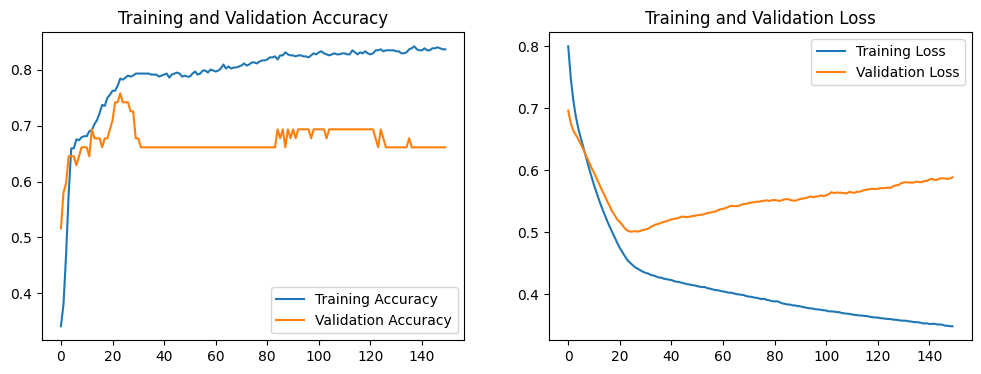

In [10]:
# Графиктерді салу функциясы
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy графигі
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss графигі
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

Бағалау

In [11]:
# Тест жиынында тексеру
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Set Accuracy: {accuracy*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7077 - loss: 0.6226
Test Set Accuracy: 70.78%



### Қорытынды

Бұл жұмыста сіз:
1.  Алдын ала өңдеуді қажет етпейтін таза сандық деректермен жұмыс істедіңіз.
2.  Медициналық деректер негізінде диагноз қоятын нейрондық желі жасадыңыз.

**Сұрақ:** Егер жасырын қабаттар санын көбейтсеңіз, модельдің дәлдігі қалай өзгереді? Тәжірибе жасап көріңіз.


егер жасырын қабаттар саны көбейсе оортааша болса Validation accuracy жоғарылайды, ал одан саайын көбейтсек немесе тым көп жасасақ ол оверфиттингқа алып келеді